In [188]:
lag

UndefVarError: UndefVarError: lag not defined

In [191]:
using Revise
using Plots, CSV, DataFrames
includet("draftpolicy.jl")

### I.  Example Draft Policy Plot

In [242]:
N=3
G= 20
s = Season(N,G)
abilities = [0,1/3,2/3]
record,incentives = calculate_draft_rule(s,nothing,true,abilities,10) 
summarize(record)

Final Draft probabilities: 
[0.643833, 0.343833, 0.0123333]
Stopped at match 37
Final record: 
[16, 21, 23]
Ability estimates: 
[0.217582, 0.362241, 0.420176]


In [264]:
0.644+0.0123/2

0.65015

In [253]:
plot(1:length(incentives),incentives,label=[""],xlabel="Match",ylabel="Bound on Draft Probability Change")
savefig("sim3_inc.pdf")

In [255]:
plot(1:(size(record.draft_prob,2)),transpose(record.draft_prob),xlabel="Match",ylabel="Percentage",
    color=[:blue :red :green], legend=:topright,label=["T1","T2","T3"]) 
savefig("sim3_prod.pdf")

In [256]:
plot(1:(size(record.cwins,2)),transpose(record.cwins),xlabel="Match",ylabel="Wins",
    color=[:blue :red :green], legend=:top,label=["T1","T2","T3"]) 
savefig("sim3_wins.pdf")

In [257]:
plot(1:(size(record.abilities,2)),transpose(record.abilities),xlabel="Match",ylabel="Abilities",
    color=[:blue :red :green], legend=:top,label=["T1","T2","T3"]) 
#plot(1:size(record.cwins,1),record.cwins,linestyle=:dash,color=[:blue :red :green], legend=:top,
  #  title="Win Records", 
   # label=["T1","T2","T3"],xlabel="Match",ylabel="Cumulative Wins")
savefig("sim3_abilities.pdf")




#



### II. Expected Gain over Uniform Lottery

In [265]:
print(length(s.matches[:,2]))

9

In [260]:
N=3
G=3
s = Season(N,G)

stops = zeros(20)
obj = zeros(20)

for m in 1:20
    o,st = expected_objective(s,[1/3,1/3,1/3],false,m)
    obj[m] = o
    stops[m] = st 
    println("done ", m)
end 

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20


In [262]:
plot(1:20,obj.-0.5,color=[:blue],title="Expected Gain over Uniform Lottery",xlabel="B",ylabel="Probability",label=[""])
savefig("sim_obj.pdf")
plot(1:20,stops/size(s.matches,1),color=[:red],title="Games Taken Into Account",label=[""],xlabel="B",ylabel="Percent")
savefig("sim_stops.pdf")

## 2. Plotting Draft Policy on Real Data

In [61]:
#1985,1987,1988,1989
year = 1989 
team_id = CSV.read(string("/Users/evanmunro/Documents/Github/draft-policy/data/cleaned/teams_",
                            string(year),".csv"))
season = CSV.read(string("/Users/evanmunro/Documents/Github/draft-policy/data/cleaned/season_",year,".csv")) 
team_id

,team,id
,String⍰,Int64⍰
1,Atlanta Hawks,1
2,Boston Celtics,2
3,Charlotte Hornets,3
4,Chicago Bulls,4
5,Cleveland Cavaliers,5
6,Dallas Mavericks,6
7,Denver Nuggets,7
8,Detroit Pistons,8
9,Golden State Warriors,9


In [41]:
matches = convert(Matrix, season[[:hID,:aID]])
wins = convert(Array, season[:win])
teams = convert(Array,team_id[:id])

#0.5 had good results 
record=calculate_draft_rule(teams,matches,wins,16,10)
# reduce at 69 when multiple=5

stopped adjusting: 279
stopped adjusting: 280
stopped adjusting: 281
stopped adjusting: 282
stopped adjusting: 283
stopped adjusting: 284
stopped adjusting: 285
stopped adjusting: 286
stopped adjusting: 287
stopped adjusting: 288
stopped adjusting: 289
stopped adjusting: 290
stopped adjusting: 291
stopped adjusting: 292
stopped adjusting: 293
stopped adjusting: 294
stopped adjusting: 295
stopped adjusting: 296
stopped adjusting: 297
stopped adjusting: 298
stopped adjusting: 299
stopped adjusting: 300
stopped adjusting: 301
stopped adjusting: 302
stopped adjusting: 303
stopped adjusting: 304
stopped adjusting: 305
stopped adjusting: 306
stopped adjusting: 307
stopped adjusting: 308
stopped adjusting: 309
stopped adjusting: 310
stopped adjusting: 311
stopped adjusting: 312
stopped adjusting: 313
stopped adjusting: 314
stopped adjusting: 315
stopped adjusting: 316
stopped adjusting: 317
stopped adjusting: 318
stopped adjusting: 319
stopped adjusting: 320
stopped adjusting: 321
stopped adj

stopped adjusting: 636
stopped adjusting: 637
stopped adjusting: 638
stopped adjusting: 639
stopped adjusting: 640
stopped adjusting: 641
stopped adjusting: 642
stopped adjusting: 643
stopped adjusting: 644
stopped adjusting: 645
stopped adjusting: 646
stopped adjusting: 647
stopped adjusting: 648
stopped adjusting: 649
stopped adjusting: 650
stopped adjusting: 651
stopped adjusting: 652
stopped adjusting: 653
stopped adjusting: 654
stopped adjusting: 655
stopped adjusting: 656
stopped adjusting: 657
stopped adjusting: 658
stopped adjusting: 659
stopped adjusting: 660
stopped adjusting: 661
stopped adjusting: 662
stopped adjusting: 663
stopped adjusting: 664
stopped adjusting: 665
stopped adjusting: 666
stopped adjusting: 667
stopped adjusting: 668
stopped adjusting: 669
stopped adjusting: 670
stopped adjusting: 671
stopped adjusting: 672
stopped adjusting: 673
stopped adjusting: 674
stopped adjusting: 675
stopped adjusting: 676
stopped adjusting: 677
stopped adjusting: 678
stopped adj

stopped adjusting: 993
stopped adjusting: 994
stopped adjusting: 995
stopped adjusting: 996
stopped adjusting: 997
stopped adjusting: 998
stopped adjusting: 999
stopped adjusting: 1000
stopped adjusting: 1001
stopped adjusting: 1002
stopped adjusting: 1003
stopped adjusting: 1004
stopped adjusting: 1005
stopped adjusting: 1006
stopped adjusting: 1007
stopped adjusting: 1008
stopped adjusting: 1009
stopped adjusting: 1010
stopped adjusting: 1011
stopped adjusting: 1012
stopped adjusting: 1013
stopped adjusting: 1014
stopped adjusting: 1015
stopped adjusting: 1016
stopped adjusting: 1017
stopped adjusting: 1018
stopped adjusting: 1019
stopped adjusting: 1020
stopped adjusting: 1021
stopped adjusting: 1022
stopped adjusting: 1023
stopped adjusting: 1024
stopped adjusting: 1025
Final standings in the season: 
[52.0, 42.0, 20.0, 47.0, 57.0, 38.0, 44.0, 63.0, 43.0, 45.0, 28.0, 21.0, 57.0, 15.0, 49.0, 26.0, 52.0, 46.0, 55.0, 39.0, 27.0, 21.0, 47.0, 51.0, 40.0]


([0.04 0.03675 … 0.0 0.0; 0.04 0.021 … 0.00325 0.00325; … ; 0.04 0.0306167 … 0.002 0.002; 0.04 0.0433333 … 0.0825333 0.0825333], [0.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [52.0, 42.0, 20.0, 47.0, 57.0, 38.0, 44.0, 63.0, 43.0, 45.0  …  26.0, 52.0, 46.0, 55.0, 39.0, 27.0, 21.0, 47.0, 51.0, 40.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.069469, -9.69565e-9, -9.92431e-9, -8.91699e-9, 0.188085, -9.80757e-9, -9.59843e-9, 0.331949, -9.65411e-9, -9.5096e-9  …  -9.90484e-9, 0.0628842, -9.30899e-9, 0.132783, -9.80628e-9, -9.89615e-9, -9.92218e-9, -9.08105e-9, 0.0345871, -9.76029e-9])

In [42]:
diff = cumsum(losses,dims=2)[:,332] - cumsum(wins,dims=2)[:,332]

df = DataFrame(team = copy(team_id[:team]),wins = copy(end_wins),score = copy(ys[:,943]),diff=diff)
sort!(df, (:wins), rev=(true))
df

,team,wins,score,diff
,String⍰,Float64,Float64,Float64
1,Detroit Pistons,63.0,0.0,-13.0
2,Cleveland Cavaliers,57.0,0.0,-16.0
3,Los Angeles Lakers,57.0,0.0,-10.0
4,Phoenix Suns,55.0,0.00283333,-5.0
5,Atlanta Hawks,52.0,0.0,-9.0
6,New York Knicks,52.0,0.0,-11.0
7,Utah Jazz,51.0,0.002,-6.0
8,Milwaukee Bucks,49.0,0.0045,-5.0
9,Chicago Bulls,47.0,0.00133333,-4.0


In [126]:
cumsum(losses,dims=2)

23×943 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  15.0  15.0  15.0  15.0  15.0  15.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      7.0   7.0   7.0   7.0   7.0   7.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     21.0  21.0  21.0  21.0  21.0  21.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0     17.0  17.0  17.0  17.0  17.0  17.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     15.0  15.0  15.0  15.0  15.0  15.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  12.0  12.0  12.0  12.0  12.0  12.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     16.0  16.0  16.0  16.0  16.0  16.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0     22.0  22.0  22.0  22.0  22.0  22.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     11.0  11.0  11.0  11.0  11.0  11.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     21.0  21.0  21.0  21.0  21.0  21.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  20.0  20.0  20.0  20.0  20.0  20.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      4.0   4.0   4.0   4.0   4.0   4.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0     12.0  12.0  12.0  12.0  12.0  12.0
 0.0  0.0  0.

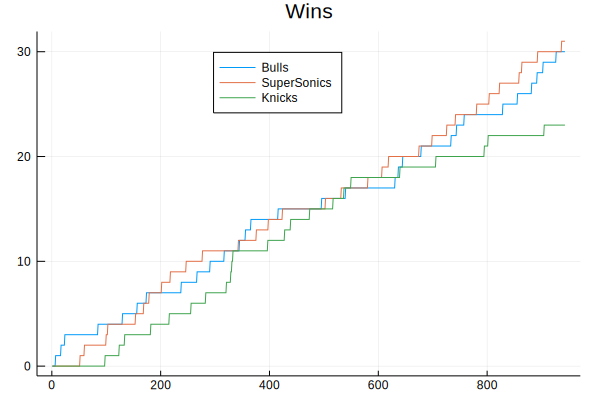

In [114]:
cwins = cumsum(wins,dims=2)

plot(1:size(cwins,2),transpose(cwins[[3,21,15],:]),label=["Bulls","SuperSonics","Knicks"],title="Wins",legend=:top)
#savefig("wins86.pdf")
#plot(1:size(cwins,2),transpose(ys[[3,21,15],2:944]),label=["Bulls","SuperSonics","Knicks"],legend=:top,title="Draft Prob")
#savefig("draft86.pdf")

In [178]:
cwins[[3,21,15],:]

3×943 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  30.0  30.0  30.0  30.0  30.0  30.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     31.0  31.0  31.0  31.0  31.0  31.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     23.0  23.0  23.0  23.0  23.0  23.0

In [176]:
size(cumsum(wins,dims=2),2)

943

In [205]:
N=3
G=3
teams = Array(1:N)
matches = repeat(collect(combinations(teams,2)),G)

9-element Array{Array{Int64,1},1}:
 [1, 2]
 [1, 3]
 [2, 3]
 [1, 2]
 [1, 3]
 [2, 3]
 [1, 2]
 [1, 3]
 [2, 3]

In [214]:
test = transpose(reshape(collect(Iterators.flatten(combinations(teams,2))),(2,3)))

3×2 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 1  2
 1  3
 2  3

In [117]:
true && false

false